# Determining Predictors of Stroke

## Factors:
+ Gender
+ Hypertension
+ Heart Disease
+ Ever married
+ Work type
+ Residence type
+ Glucose level
+ BMI
+ Smoking status
+ Stroke

In [5]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('healthcare-dataset-stroke-data.csv',delimiter = ',', delim_whitespace=False)

print(df.head())
print(df.columns)
print(df.dtypes)
print(df.info)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Index(['id', 'gender', 'age', 'hypertension', 'heart_dis

Gender information
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Hypertension
0    4612
1     498
Name: hypertension, dtype: int64


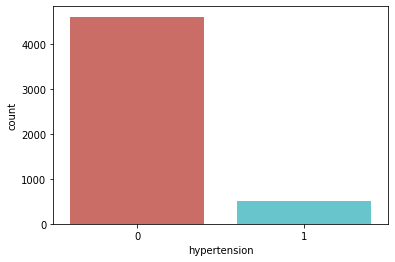

Heart disease
0    4834
1     276
Name: heart_disease, dtype: int64


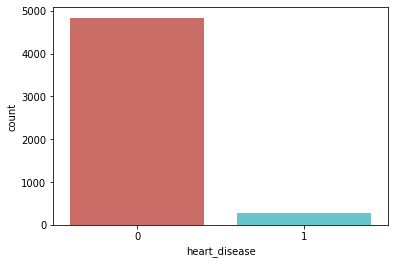

Ever married
Yes    3353
No     1757
Name: ever_married, dtype: int64


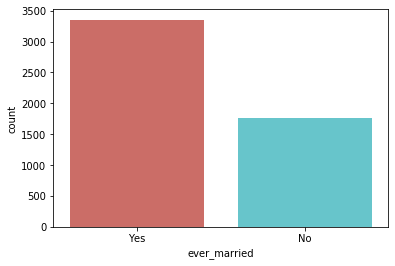

Residence type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


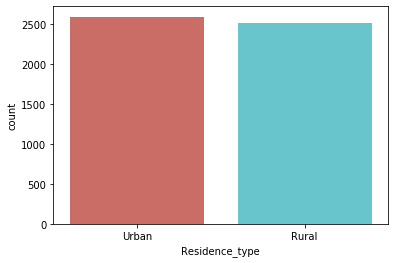

Stroke
0    4861
1     249
Name: stroke, dtype: int64


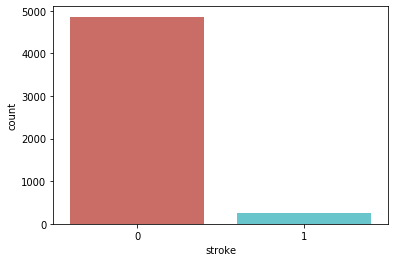

In [6]:
print('Gender information')
print(df.gender.value_counts(dropna=True))

#plt.hist(df.hypertension.value_counts())
print('Hypertension')
print(df.hypertension.value_counts(dropna=True))
sns.countplot(x='hypertension',data=df, palette='hls')
#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{:.1f}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'
plt.savefig(savedirectory + 'hypertension_count.png')

plt.show()


print('Heart disease')
print(df.heart_disease.value_counts(dropna=True))
sns.countplot(x='heart_disease',data=df, palette='hls')
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'
plt.savefig(savedirectory + 'heart_disease_count.png')
plt.show()

print('Ever married')
print(df.ever_married.value_counts(dropna=True))
sns.countplot(x='ever_married',data=df, palette='hls')
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'
plt.savefig(savedirectory + 'ever_married_count.png')
plt.show()

print('Residence type')
print(df.Residence_type.value_counts(dropna=True))
sns.countplot(x='Residence_type',data=df, palette='hls')
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'
plt.savefig(savedirectory + 'residence_type_count.png')
plt.show()


print('Stroke')
print(df.stroke.value_counts(dropna=True))
sns.countplot(x='stroke',data=df, palette='hls')
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'
plt.savefig(savedirectory + 'stroke_count.png')
plt.show()

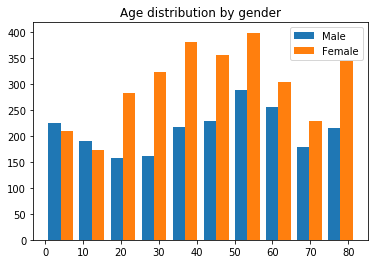

In [7]:
plt.hist([df.age[df.gender == 'Male'],df.age[df.gender =='Female']], label =['Male','Female'])
plt.title('Age distribution by gender')
plt.legend(['Male','Female'])
savedirectory = 'C:/Users/kojis/Desktop/work/Stroke_project/'

plt.savefig(savedirectory + 'age_distribution.png')

In [8]:
df['Residence_type']=pd.Categorical(df['Residence_type'],['Rural','Urban'], ordered = True)
df['resid_index'] = np.median(df['Residence_type'].cat.codes)

age_cat = pd.cut(df.age,bins = [0,11,21,31,41,51,61,71,81,90],labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90'])
df.insert(3,'age_group',age_cat)

print(age_cat.head())


print(df.describe())
print(df.age[df.gender == 'Male'].describe())
print(df.age[df.gender == 'Female'].describe())

0    61-70
1    51-60
2    71-80
3    41-50
4    71-80
Name: age, dtype: category
Categories (9, object): [0-10 < 11-20 < 21-30 < 31-40 ... 51-60 < 61-70 < 71-80 < 81-90]
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  resid_index  
count        5110.000000  4909.000000  5110.000000       5110.0  
mean          106.147677    28.893237     0.048728          1.0  
std            45.283560     7.854067     0.2

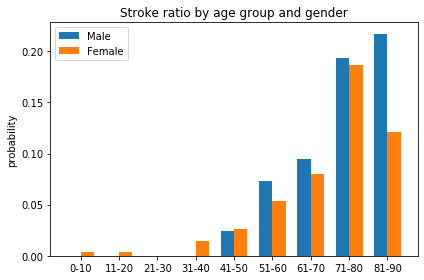

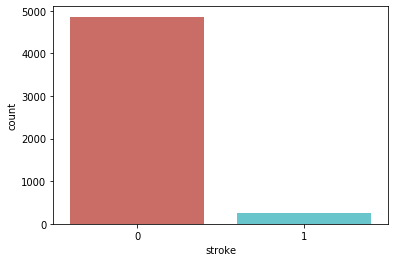

In [9]:
g = df.groupby(['age_group','gender']).mean().reset_index()
male = g[g.gender=='Male']
female = g[g.gender=='Female']

labels = male['age_group']
men_means = male['stroke']
women_means = female['stroke']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('probability')
ax.set_title('Stroke ratio by age group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        #ax.annotate('{}'.format(height),
        #            xy=(rect.get_x() + rect.get_width() / 2, height),
        #            xytext=(0, 3),  # 3 points vertical offset
        #            textcoords="offset points",
        #            ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig(savedirectory + 'stroke.png')
plt.show()

sns.countplot(x='stroke',data=df, palette='hls')
plt.show()



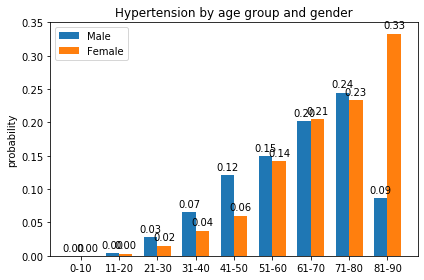

In [10]:
labels = male['age_group']
men_means = male['hypertension']
women_means = female['hypertension']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('probability')
ax.set_title('Hypertension by age group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig(savedirectory + 'hypertension.png')

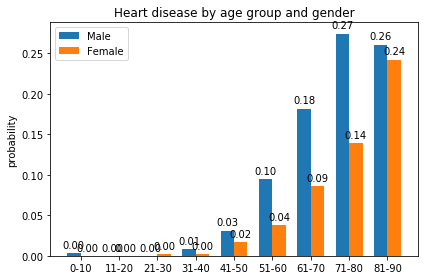

In [11]:
labels = male['age_group']
men_means = male['heart_disease']
women_means = female['heart_disease']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('probability')
ax.set_title('Heart disease by age group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig(savedirectory + 'heart_disease.png')


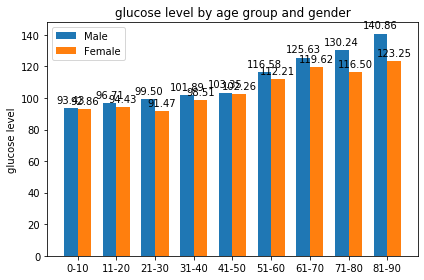

In [12]:
g = df.groupby(['age_group','gender']).mean().reset_index()
male = g[g.gender=='Male']
female = g[g.gender=='Female']

labels = male['age_group']
men_means = male['avg_glucose_level']
women_means = female['avg_glucose_level']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('glucose level')
ax.set_title('glucose level by age group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig(savedirectory + 'glucose_level.png')


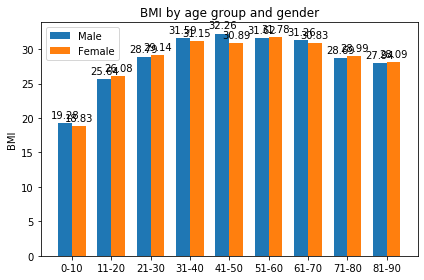

In [13]:
g = df.groupby(['age_group','gender']).mean().reset_index()
male = g[g.gender=='Male']
female = g[g.gender=='Female']

labels = male['age_group']
men_means = male['bmi']
women_means = female['bmi']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('BMI')
ax.set_title('BMI by age group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height,'.1f'),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig(savedirectory + 'BMI.png')
#plt.savefig('age,glucose,BMI.png')
#plt.show()

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   
resid_index             NaN       NaN           NaN            NaN   

                   avg_glucose_level       bmi    stroke  resid_index  
id                          0.001092  0.003084  0.006388          NaN  
age                         0.238171  0.333398  0.245257          NaN  
hypertension                0.174474  0.167811  0.127904          NaN  
heart_disease               0.161857  0.041357  0.134914          NaN  
avg_gluco

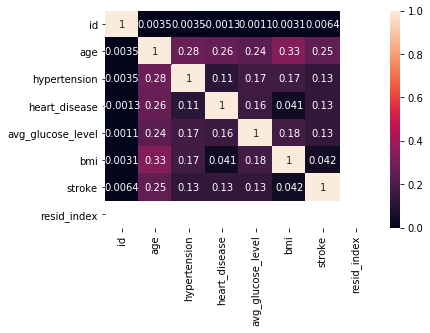

In [14]:
corrMatrix = df.corr()
print(corrMatrix)
#pd.to_csv

sns.heatmap(corrMatrix,annot=True)
#plt.show()
plt.savefig(savedirectory + "health_data_corr_map.png")

In [15]:
# correlation coefficient with p-value
import itertools
from scipy.stats import pearsonr

for i,j in itertools.combinations(df,2):
    x =df.loc[:,[i]].values
    y =df.loc[:,[j]].values
    if x.dtype!='object' and y.dtype!='object':
        a,b = pearsonr(np.ravel(x),np.ravel(y))
        print(round(a,3),round(b,3))
    

0.004 0.8
0.004 0.8
-0.001 0.926
0.001 0.938


ValueError: array must not contain infs or NaNs

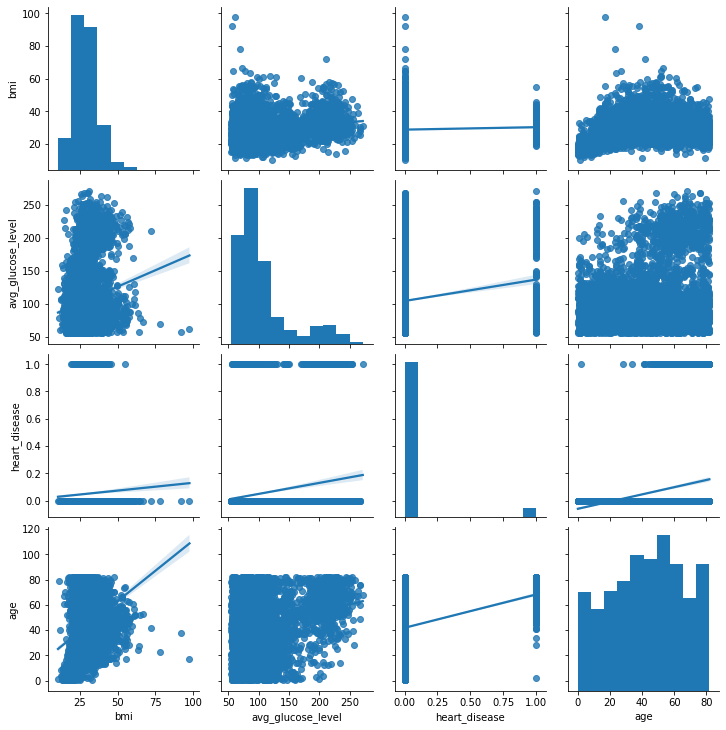

In [16]:
sns.pairplot(df,kind = 'reg', vars =['bmi', 'avg_glucose_level','heart_disease','age'])
plt.savefig(savedirectory + "pairplot.png")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4909 non-null   int64   
 1   gender             4909 non-null   object  
 2   age                4909 non-null   float64 
 3   age_group          4909 non-null   category
 4   hypertension       4909 non-null   int64   
 5   heart_disease      4909 non-null   int64   
 6   ever_married       4909 non-null   object  
 7   work_type          4909 non-null   object  
 8   Residence_type     4909 non-null   category
 9   avg_glucose_level  4909 non-null   float64 
 10  bmi                4909 non-null   float64 
 11  smoking_status     4909 non-null   object  
 12  stroke             4909 non-null   int64   
 13  resid_index        4909 non-null   float64 
dtypes: category(2), float64(4), int64(4), object(4)
memory usage: 508.6+ KB
[-0.00143451  0.00182623  0.0627

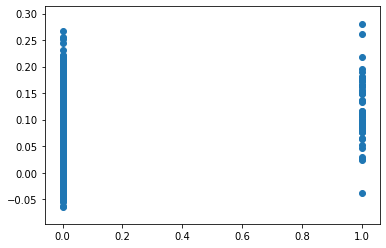

In [17]:
#from sklearn.datasets import df
df.dropna(inplace=True)
df.info()

Y = np.array(df['stroke'])
X = np.array(df[['bmi','age','hypertension','avg_glucose_level','heart_disease']])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.coef_)
print(model.intercept_)
print(model.score(X,Y))

Y_pred = model.predict(X_test)

print(Y_test[:5])
print(Y_pred[:5])

plt.scatter(Y_test, Y_pred)


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y = df['stroke']
#x = pd.get_dummies(df[['bmi','age','hypertension','avg_glucose_level','heart_disease']])
x = df[['bmi','age','hypertension','avg_glucose_level','heart_disease']]

X =sm.add_constant(x)
model =sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     78.12
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.50e-79
Time:                        18:26:25   Log-Likelihood:                 1077.0
No. Observations:                4909   AIC:                            -2142.
Df Residuals:                    4903   BIC:                            -2103.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0387      0.012     -3.261      0.001      -0.062      -0.015
bmi                  -0.0013      0.000     -3.465      0.001      -0.002      -0.001
age                   0.0017      0.000     12.320      0.000       0.001       0.002
hypertension          0.0532      0.010      5.270      0.000       0.033       0.073
avg_glucose_level     0.0004   6.54e-05      5.423      0.000       0.000       0.000
heart_disease         0.0649      0.013      4.867      0.000       0.039       0.091
==============================================================================
Omnibus:                     3993.195   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65219.899
Skew:                           4.024   Prob(JB):                         0.00
Kurtosis:                      18.940   Cond. No.                         605.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Logistic regression analysis
#https://qiita.com/y_itoh/items/6a67fc4a1a6930f0a4b5

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x =df[['bmi', 'avg_glucose_level', 'age', 'heart_disease', 'hypertension']]
y =df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.5, random_state=0)

#model = LogisticRegression()
#model.fit(X_train, Y_train)

model = smf.logit("stroke ~ bmi + avg_glucose_level + age + heart_disease + hypertension", data=df)
results=model.fit()
results.summary()
#plt.savefig(savedirectory + "logistic_regression_result.png")


Optimization terminated successfully.
         Current function value: 0.140004
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Mar 2021   Pseudo R-squ.:                  0.2047
Time:                        18:43:52   Log-Likelihood:                -687.28
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 2.621e-74
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.7762      0.543    -14.312      0.000      -8.841      -6.711
bmi                   0.0036      0.012      0.306      0.760      -0.019       0.026
avg_glucose_level     0.0047      0.001      3.671      0.000       0.002       0.007
age                   0.0678      0.006     11.962      0.000       0.057       0.079
heart_disease         0.4068      0.204      1.999      0.046       0.008       0.806
hypertension          0.5346      0.174      3.076      0.002       0.194       0.875
=====================================================================================
"""

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [21]:
X_scaled

array([[ 0.98134488,  2.77769839,  1.07013796,  4.38196829, -0.31806673],
       [ 0.45926914,  0.0138418 ,  1.64656262,  4.38196829, -0.31806673],
       [ 0.70120668,  1.48413156,  0.27201152, -0.22820795, -0.31806673],
       ...,
       [ 0.21733161, -0.50236926, -0.34875349, -0.22820795, -0.31806673],
       [-0.41934612,  1.37291993,  0.36069224, -0.22820795, -0.31806673],
       [-0.34294479, -0.45081569,  0.05030973, -0.22820795, -0.31806673]])

In [22]:
train_score =format(model.score(X_train, Y_train))
print("correct answer rate (train): ", train_score)

test_score = format(model.score(X_test, Y_test))
print("correct answer rate (test): ", test_score)

correct answer rate (train):  0.9551752241238793
correct answer rate (test):  0.960081466395112


In [23]:
log_reg=LogisticRegression().fit(X_train,Y_train)

In [24]:
log_reg.intercept_,log_reg.coef_

(array([-8.09743741]),
 array([[0.01001406, 0.00575984, 0.0686653 , 0.30253274, 0.53602133]]))

In [25]:
train_score =format(model.score(X_train, Y_train))
print("correct answer rate (train): ", train_score)

test_score = format(model.score(X_test, Y_test))
print("correct answer rate (test): ", test_score)

correct answer rate (train):  0.9551752241238793
correct answer rate (test):  0.960081466395112


In [26]:
regression_coefficient = model.coef_
pd.DataFrame(regression_coefficient.T,
            index = [x.columns.values],
            columns = ['regression_coefficient'])
#plt.savefig(savedirectory + "log_reg_coeff.png")

,regression_coefficient
bmi,0.010014
avg_glucose_level,0.005760
age,0.068665
heart_disease,0.302533
hypertension,0.536021


In [27]:
odds_raio = np.exp(model.coef_)
pd.DataFrame(np.exp(model.coef_).T,
            index = [x.columns.values],
            columns = ['odds ratio'])

,odds ratio
bmi,1.010064
avg_glucose_level,1.005776
age,1.071078
heart_disease,1.353282
hypertension,1.709193


In [28]:
from sklearn.metrics import r2_score
y_
sklearn.metrics.r2_score(y_true, y_pred)

NameError: name 'sklearn' is not defined